In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keila_wrangle as w

# Wrangle

In [2]:
# get dataset
df = w.read_wine()

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
# cleaning data
train, validate, test = w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [6]:
# found no nulls 
df[df.isnull()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
red_wine                0.0
wine_type                 0
dtype: object

SUMMARY REPORT
          
          
Dataframe head: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red_wine wine_type  
0      9.4        5         1       red  
1      9.8        5         1       red  
2      9.8        5         1       red  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column

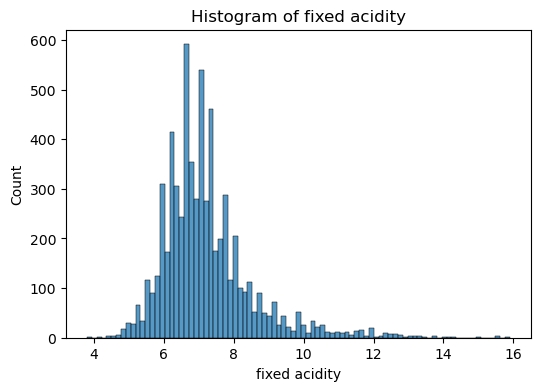

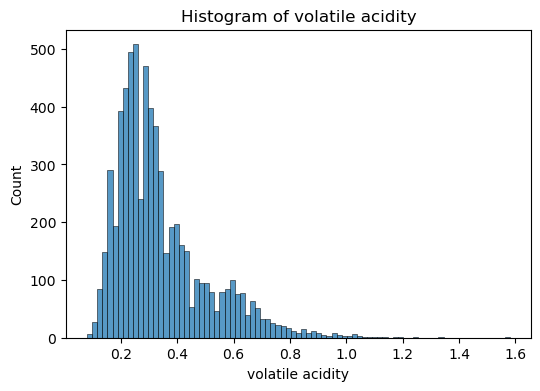

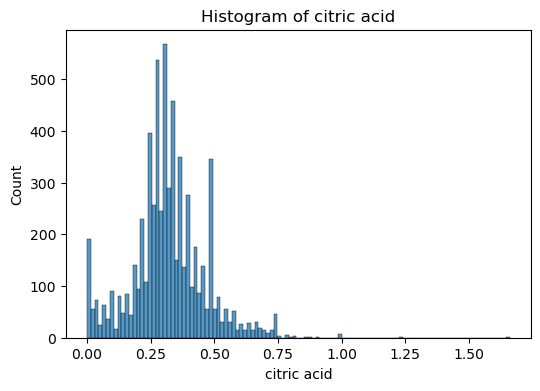

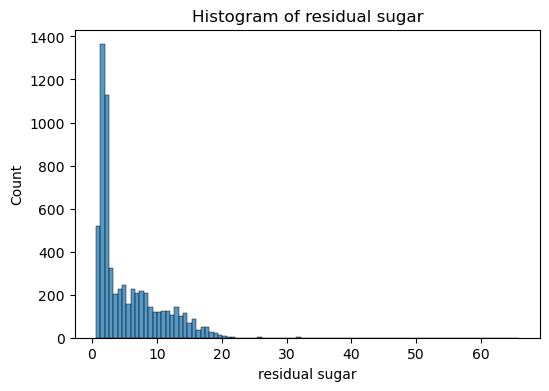

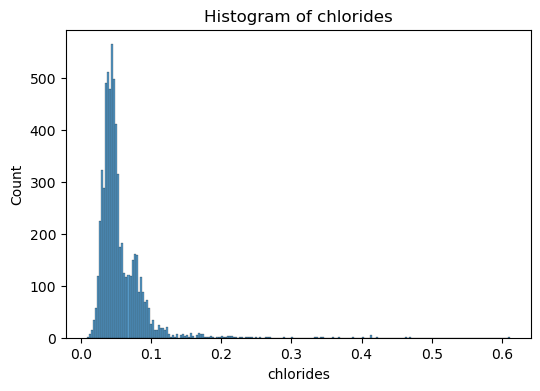

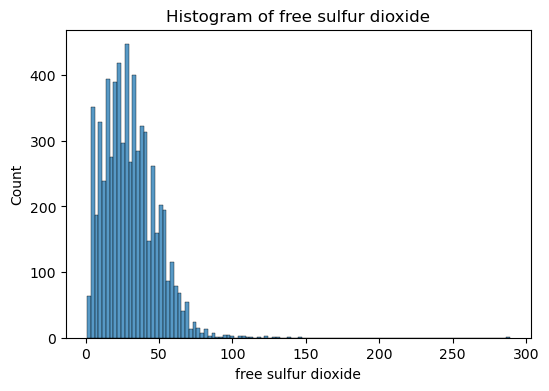

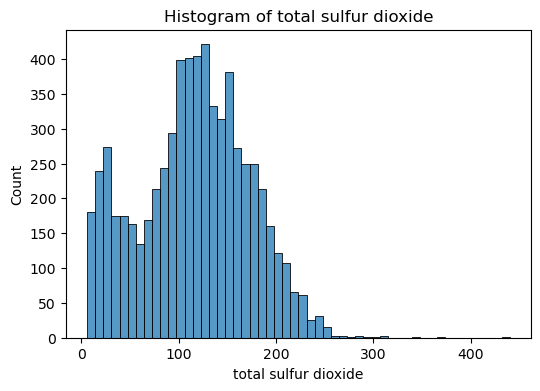

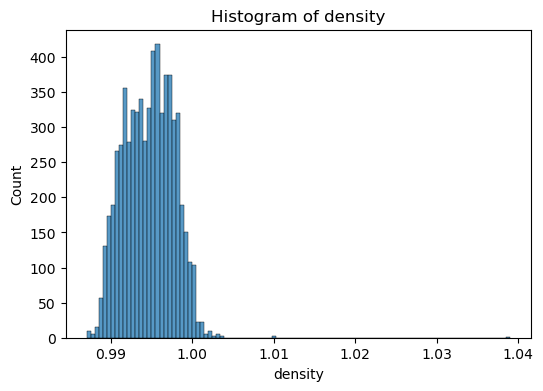

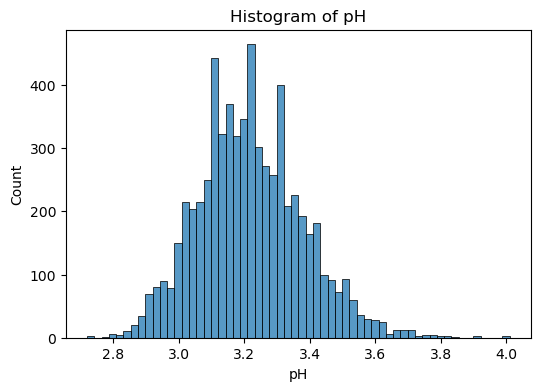

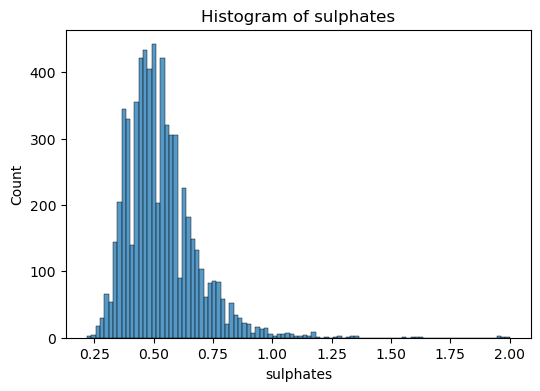

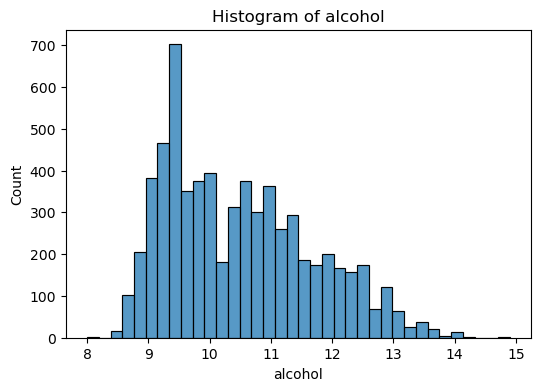

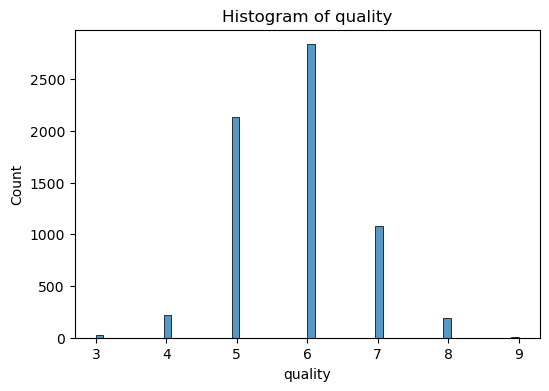

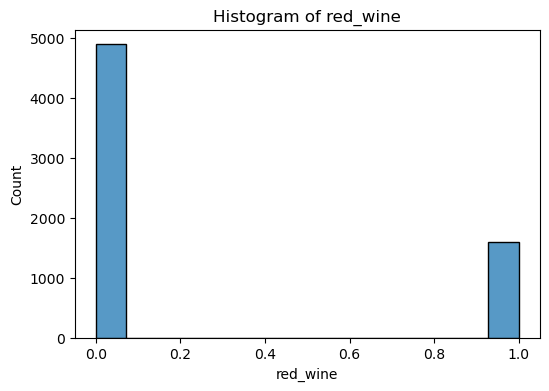

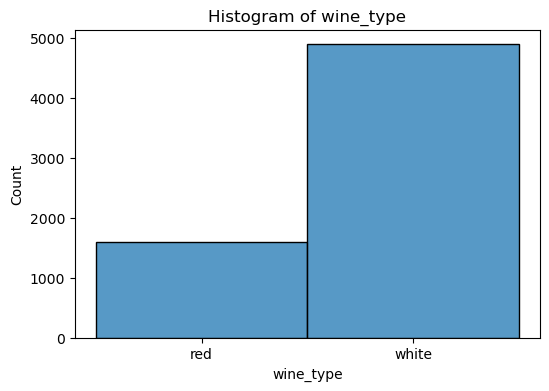

In [7]:
w.summarize(df)

In [8]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3782, 14)
validate -> (1261, 14)
test -> (1261, 14)


In [9]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

In [10]:
x_train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
0,0.662791,0.144444,0.546512,0.028169,0.155172,0.20,0.393939,0.557034,0.159292,0.488372,0.250000,0.0
1,0.337209,0.244444,0.337209,0.098592,0.074713,0.36,0.340067,0.283904,0.522124,0.476744,0.550000,0.0
2,0.139535,0.255556,0.000000,0.267606,0.195402,0.42,0.538721,0.436629,0.513274,0.476744,0.316667,0.0
3,0.372093,0.055556,0.430233,0.570423,0.172414,0.35,0.333333,0.551331,0.292035,0.383721,0.450000,0.0
4,0.558140,0.155556,0.418605,0.056338,0.298851,0.52,0.239057,0.565906,0.663717,0.755814,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.290698,0.655556,0.558140,0.558685,0.229885,0.56,0.727273,0.683777,0.398230,0.348837,0.216667,0.0
3778,0.569767,0.077778,0.348837,0.042254,0.195402,0.28,0.417508,0.449303,0.442478,0.186047,0.300000,0.0
3779,0.232558,0.200000,0.348837,0.089202,0.126437,0.74,0.414141,0.195817,0.424779,0.186047,0.583333,0.0
3780,0.255814,0.266667,0.534884,0.037559,0.218391,0.55,0.616162,0.378327,0.460177,0.313953,0.266667,0.0


* sulphates, density, total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, citric acid, volatile acidity   has outliers

In [11]:
train, validate, test = w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [12]:
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3782, 14)
validate -> (1261, 14)
test -> (1261, 14)


In [13]:
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)


In [14]:
x_train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
0,0.662791,0.144444,0.546512,0.028169,0.155172,0.20,0.393939,0.557034,0.159292,0.488372,0.250000,0.0
1,0.337209,0.244444,0.337209,0.098592,0.074713,0.36,0.340067,0.283904,0.522124,0.476744,0.550000,0.0
2,0.139535,0.255556,0.000000,0.267606,0.195402,0.42,0.538721,0.436629,0.513274,0.476744,0.316667,0.0
3,0.372093,0.055556,0.430233,0.570423,0.172414,0.35,0.333333,0.551331,0.292035,0.383721,0.450000,0.0
4,0.558140,0.155556,0.418605,0.056338,0.298851,0.52,0.239057,0.565906,0.663717,0.755814,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.290698,0.655556,0.558140,0.558685,0.229885,0.56,0.727273,0.683777,0.398230,0.348837,0.216667,0.0
3778,0.569767,0.077778,0.348837,0.042254,0.195402,0.28,0.417508,0.449303,0.442478,0.186047,0.300000,0.0
3779,0.232558,0.200000,0.348837,0.089202,0.126437,0.74,0.414141,0.195817,0.424779,0.186047,0.583333,0.0
3780,0.255814,0.266667,0.534884,0.037559,0.218391,0.55,0.616162,0.378327,0.460177,0.313953,0.266667,0.0


# Exploration

In [20]:
target_var = 'quality'
feat_vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','ph','alcohol','red_wine']
def plot_correlations(df, target_var, feat_vars):
    # Calculate correlations between feature variables and target variable
    correlations = df[feat_vars].corrwith(df[target_var]).sort_values()
   # Create a bar chart to visualize correlations
    plt.figure(figsize=(10,6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel('Target Variable')
    plt.title('Feature Variable Correlations with Target Variable')
    plt.show()

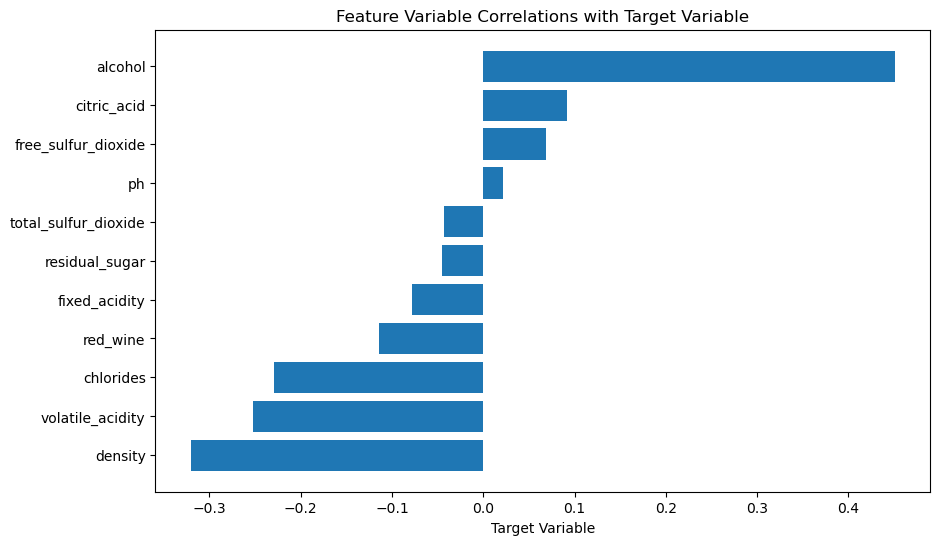

In [21]:
plot_correlations(train,target_var,feat_vars)

In [22]:
def plot_continuous_target(y):
    "Function to plot target variable"
   
    # Plot the continuous target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=5,histtype='bar')
    plt.xlabel('Target Variable')
    plt.ylabel('Frequency')
    plt.title('Distribution of Continuous Target Variable')
    plt.show()

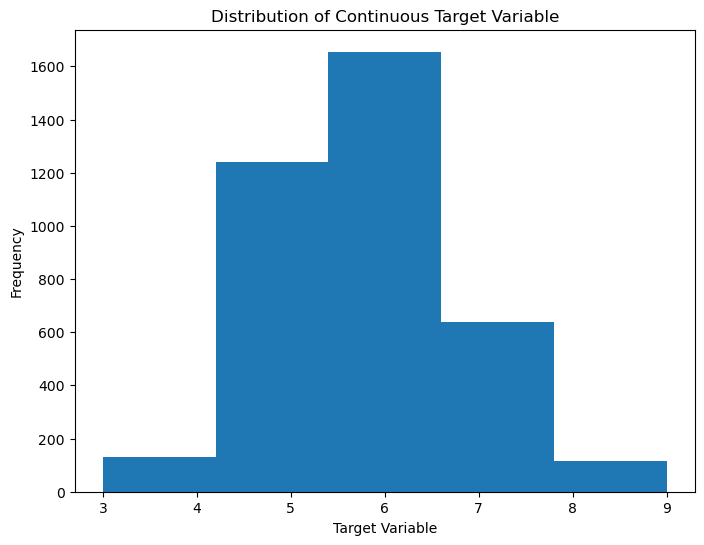

In [23]:
plot_continuous_target(train.quality)

In [47]:
cat_var = 'quality'
cont_var = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','ph','alcohol']
hue='red_wine'
def plot_categorical_and_continuous_vars(df, cat_var, cont_var,hue):
    for var in cont_var:
        # Create a box plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=cat_var, y=var, data=df, hue=hue)
        plt.axhline(y=df[var].mean(), color='r', linestyle='--')
        plt.xlabel(cat_var)
        plt.ylabel(var)
        plt.title(f'{cat_var} vs. {var}')
        plt.show()

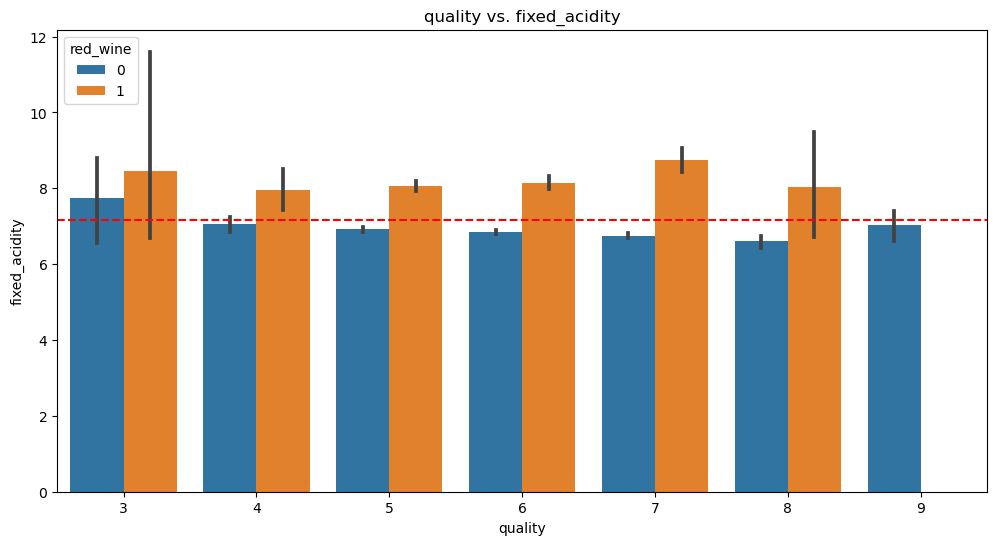

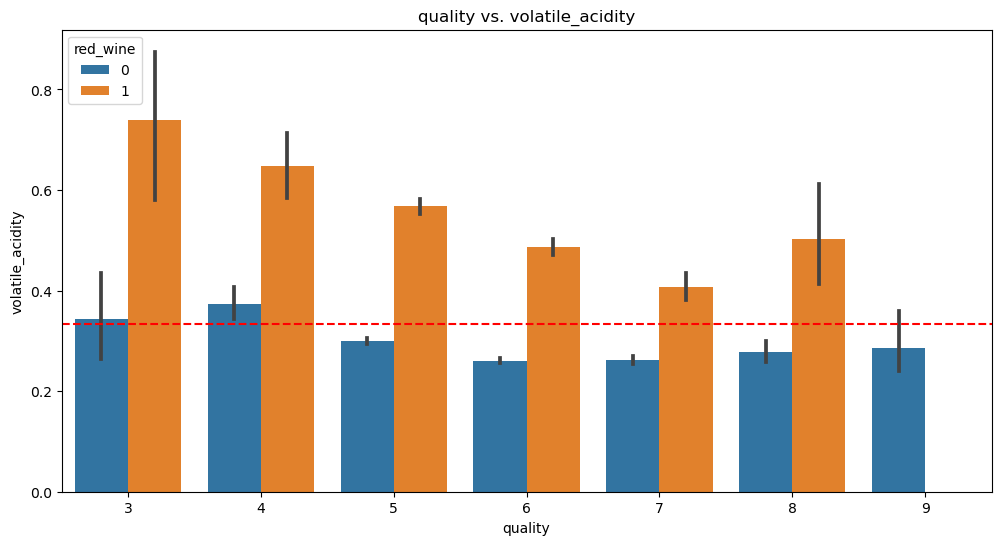

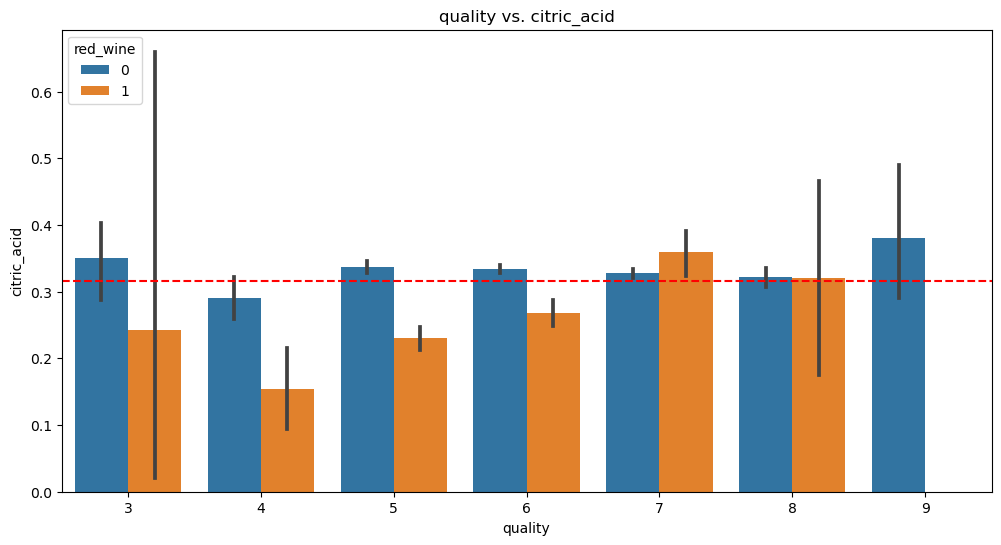

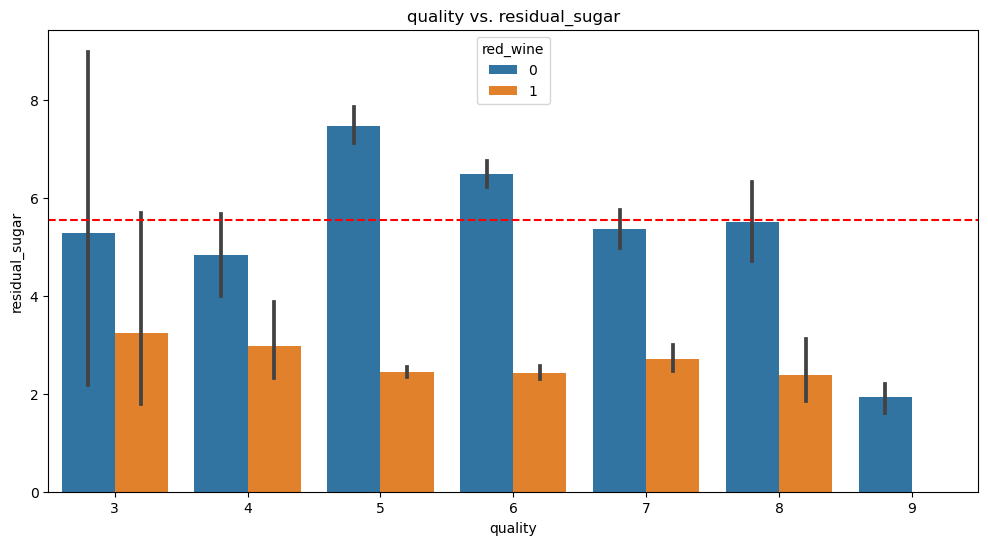

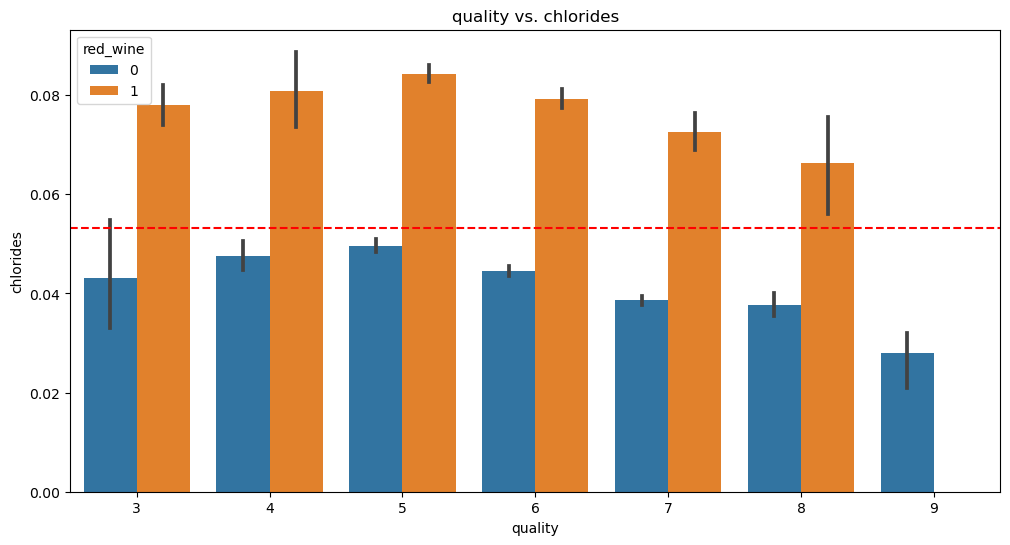

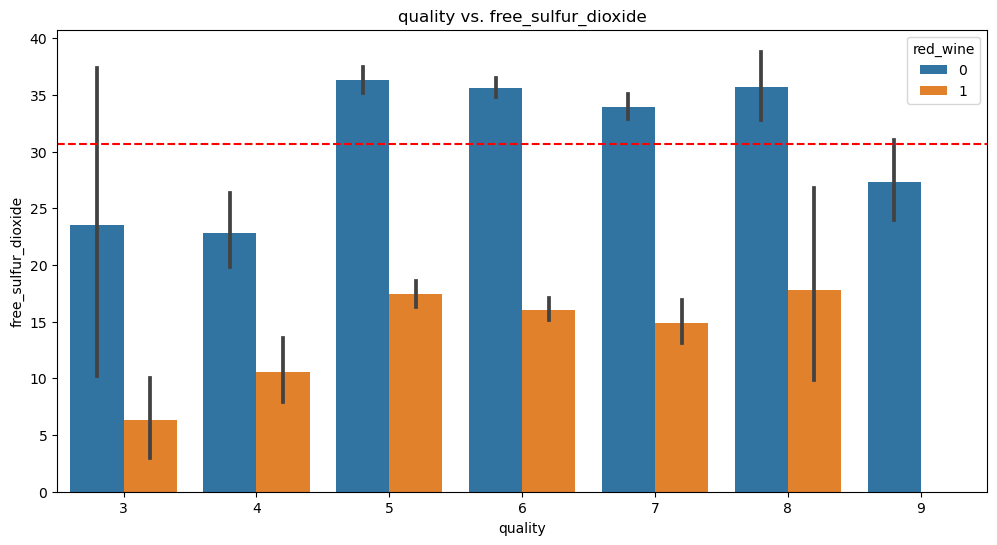

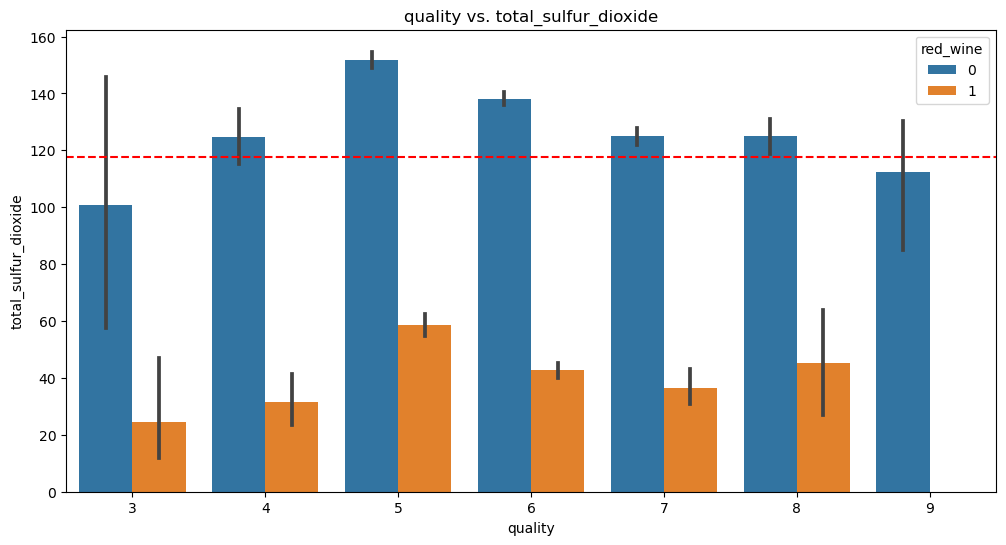

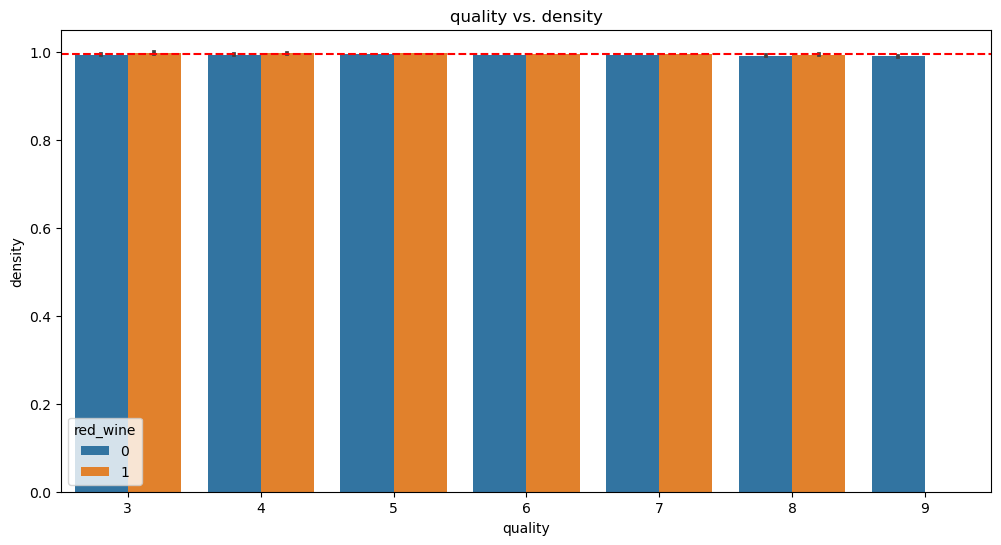

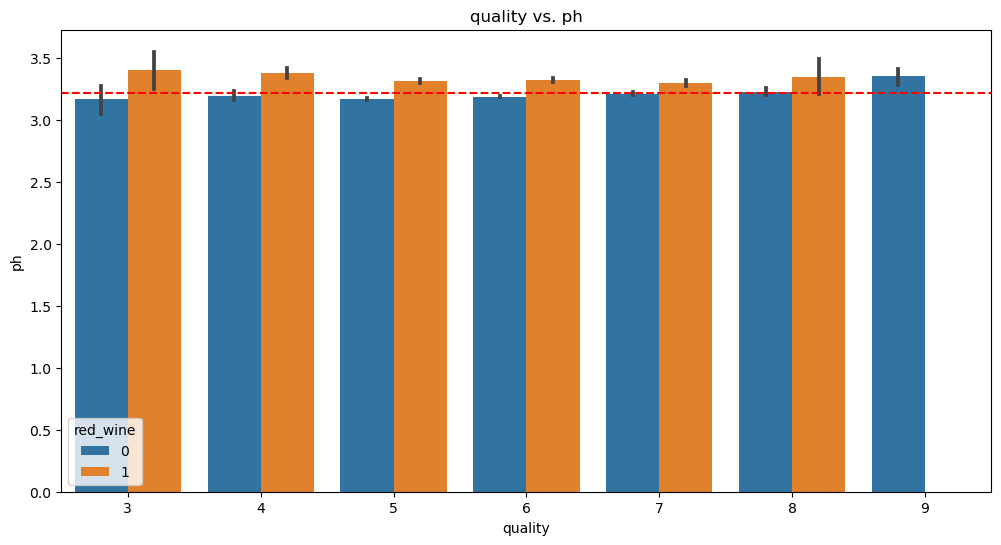

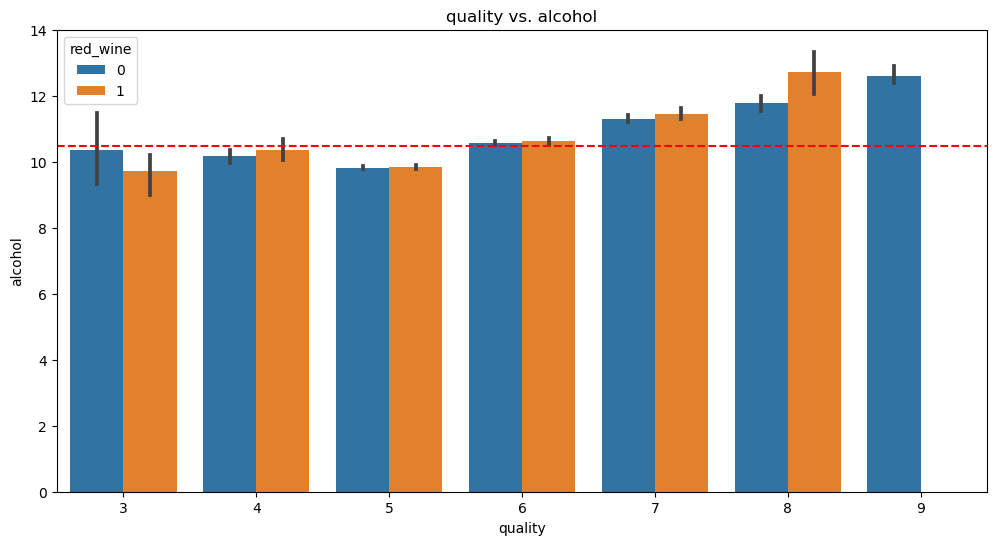

In [48]:
plot_categorical_and_continuous_vars(train, cat_var, cont_var,hue)

In [32]:
train_white_wine=train[train.red_wine==0]

In [35]:
train_red_wine=train[train.red_wine==1]

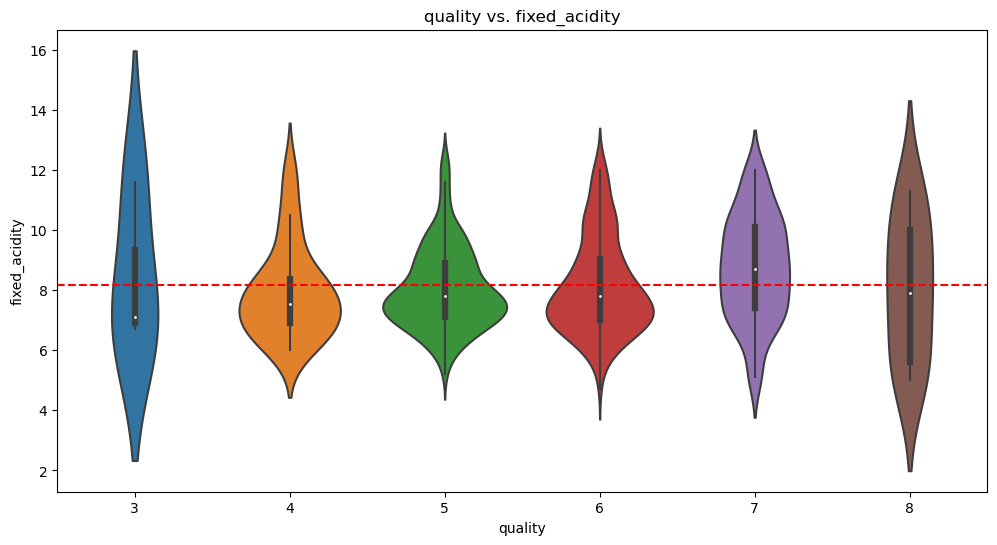

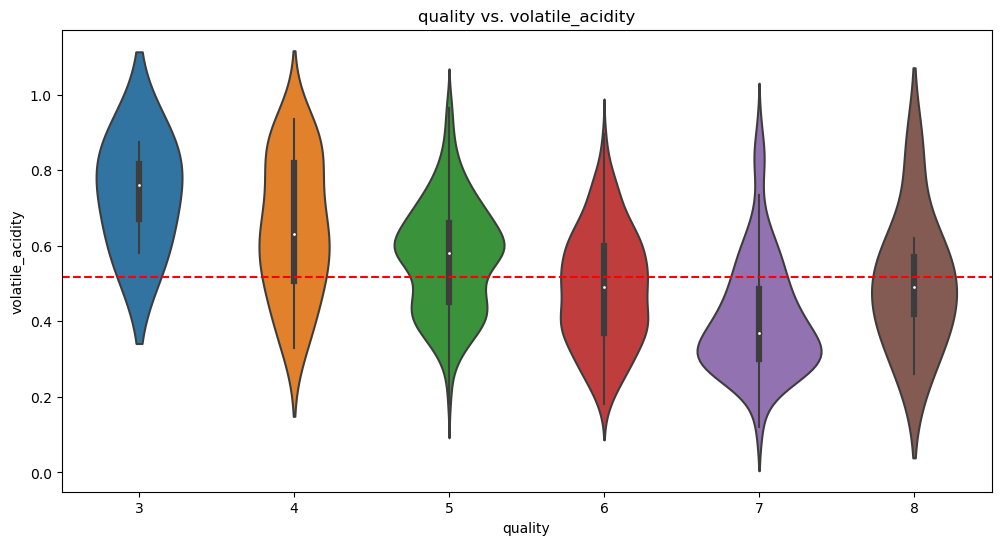

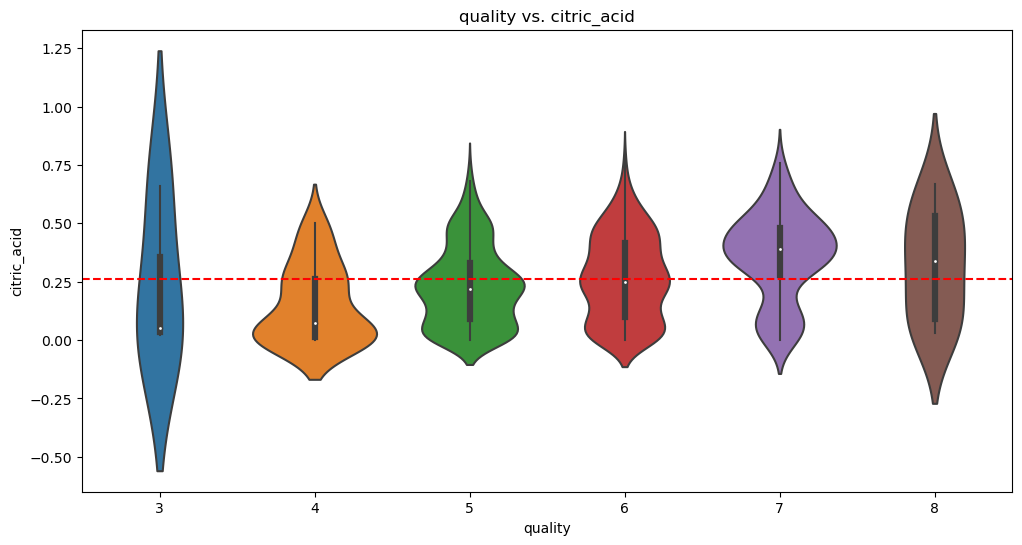

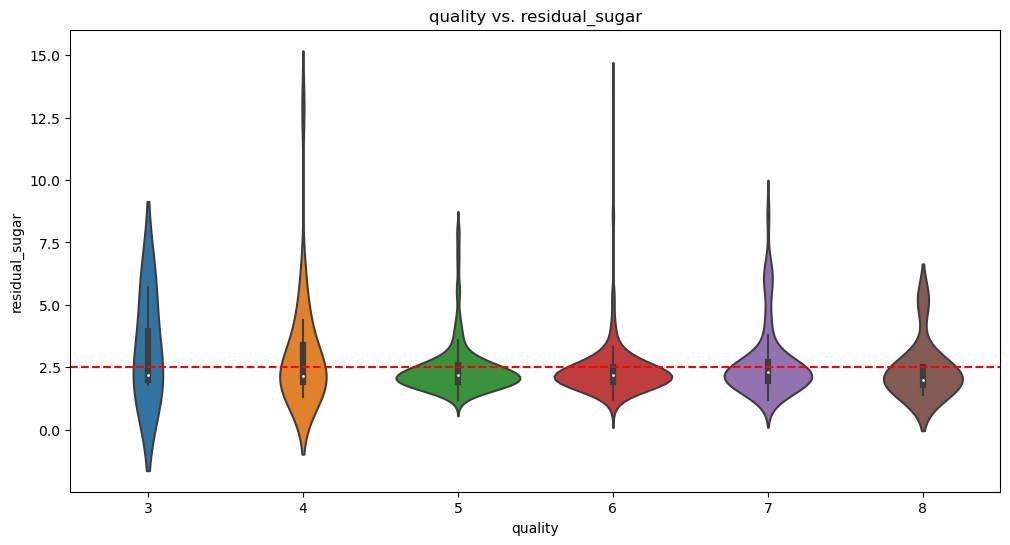

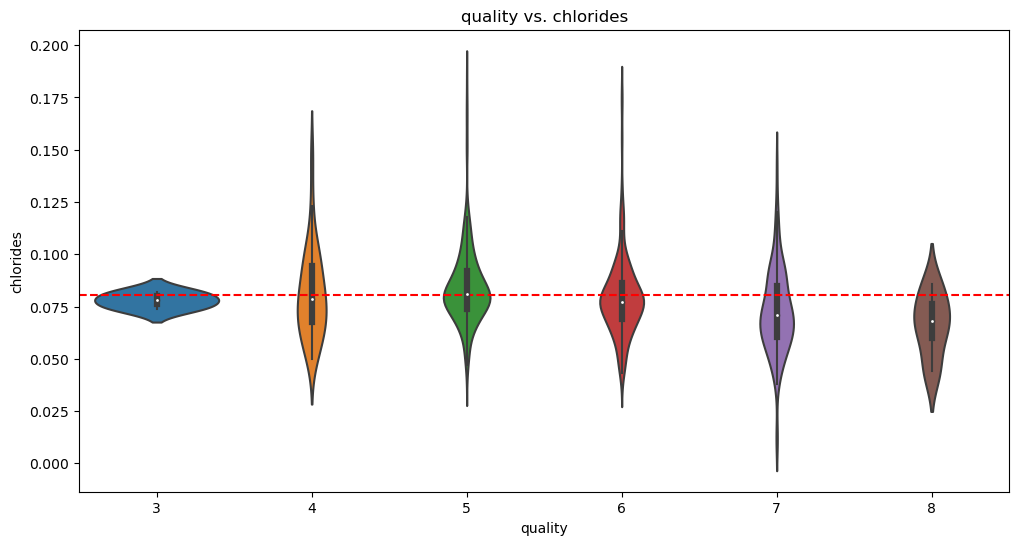

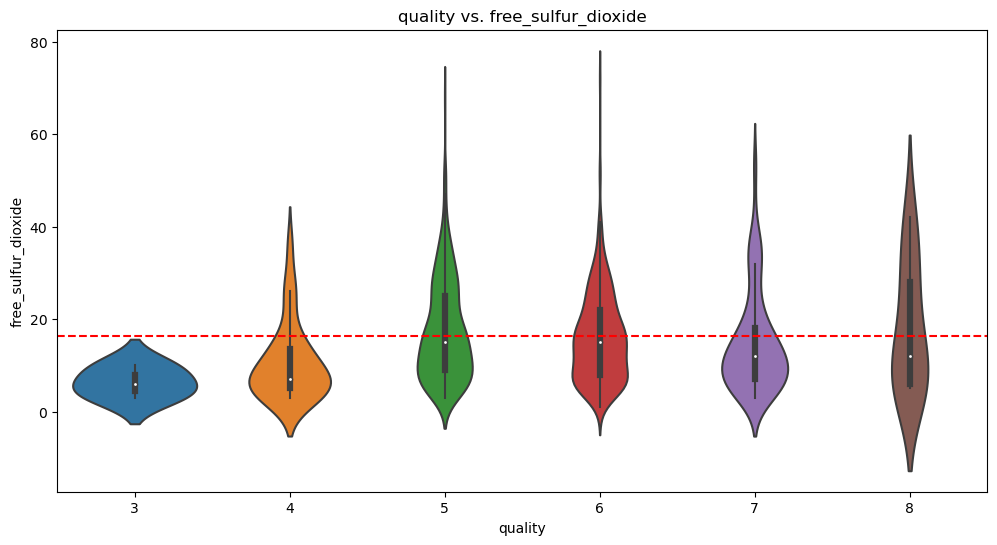

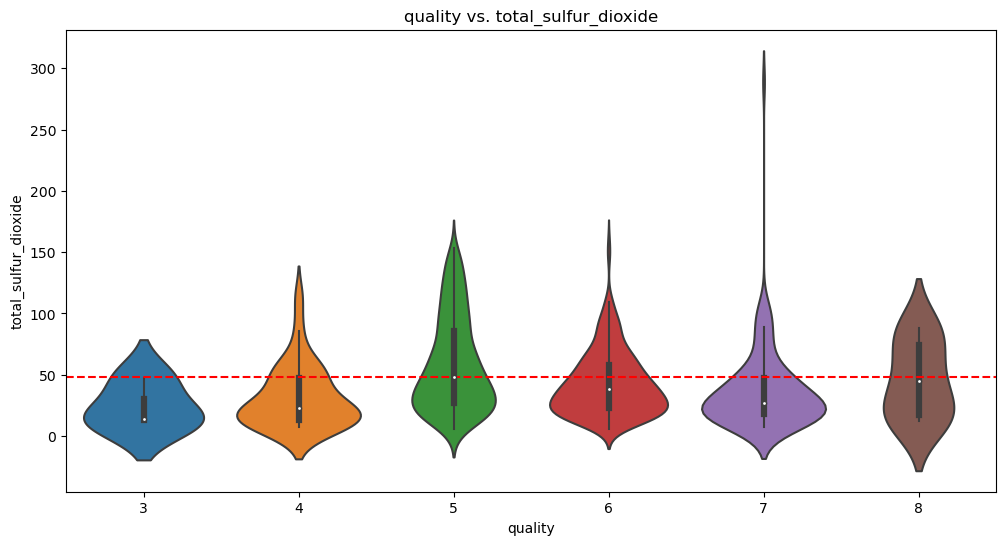

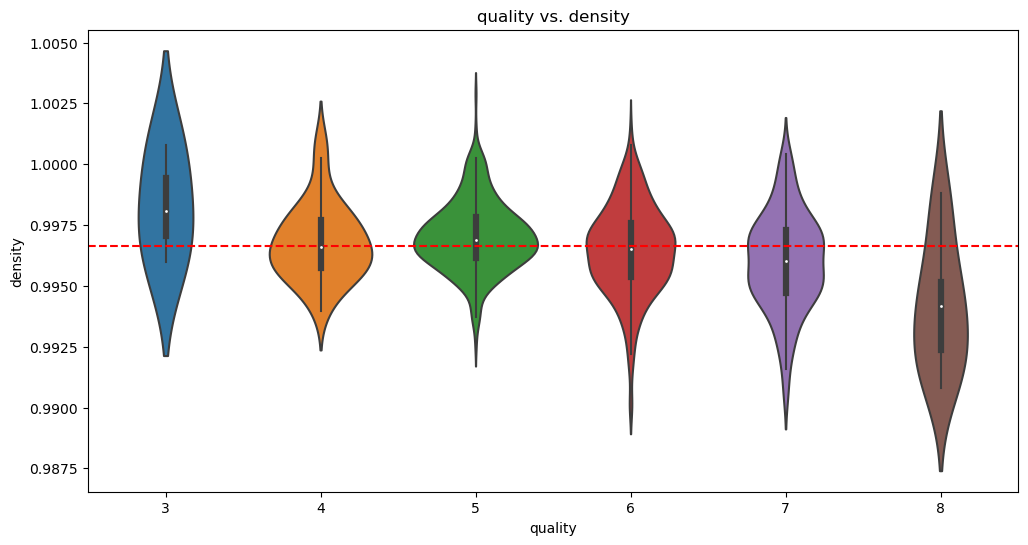

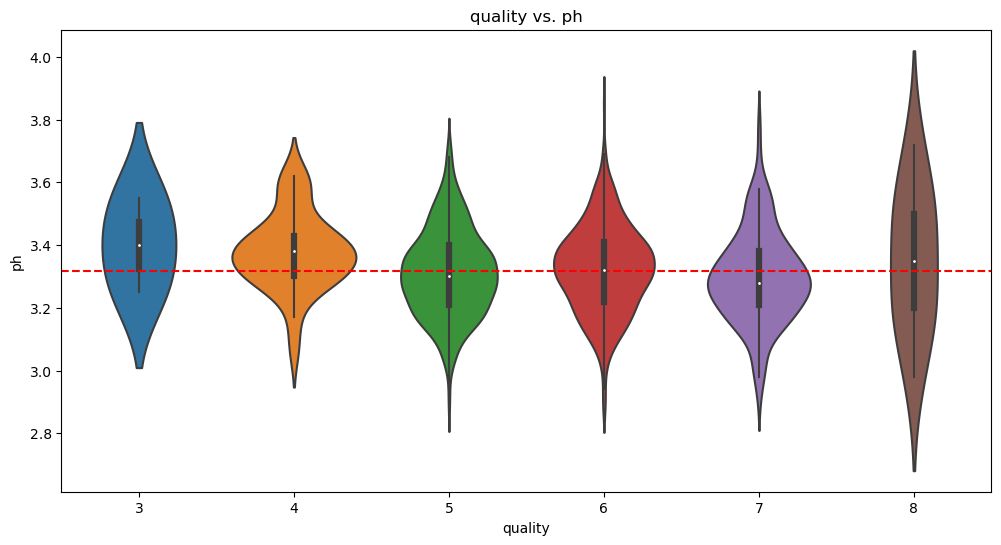

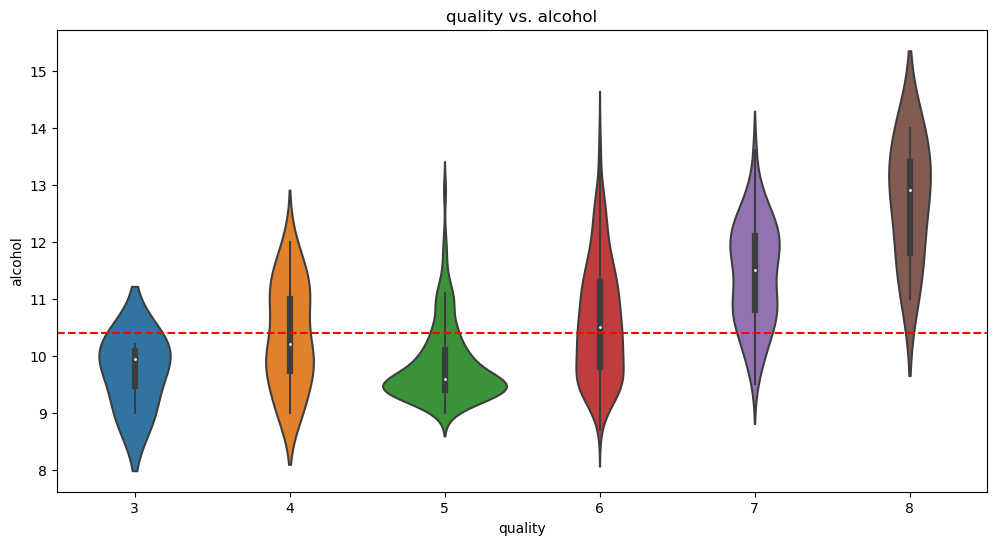

In [36]:
plot_categorical_and_continuous_vars(train_red_wine, cat_var, cont_var)

In [57]:
from sklearn.linear_model import LinearRegression, LassoLarsCV
import scipy.stats as stats
def statistical_tests_cont_cat(variable_continuous, variable_categorical, alpha=0.05):
    # Perform t-test or Mann-Whitney U test based on the number of categories in the categorical variable
    unique_categories = variable_categorical.unique()
    num_categories = len(unique_categories)

    if num_categories == 2:
        category1 = variable_continuous[variable_categorical == unique_categories[0]]
        category2 = variable_continuous[variable_categorical == unique_categories[1]]

        t_statistic, p_value = stats.ttest_ind(category1, category2)
        test_type = "T-Test"
    else:
        categories = [variable_continuous[variable_categorical == category] for category in unique_categories]
        statistic, p_value = stats.kruskal(*categories)
        t_statistic = statistic
        test_type = "Kruskal-Wallis Test"

    print(f"{test_type} Results:")
    print(f"Test Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

    if p_value < alpha:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")

    # Perform ANOVA or Kruskal-Wallis test based on the number of categories in the categorical variable
    if num_categories > 2:
        if num_categories <= 10:  # Perform ANOVA test
            groups = [variable_continuous[variable_categorical == category] for category in unique_categories]
            f_statistic, p_value = stats.f_oneway(*groups)
            test_type = "ANOVA"
        else:  # Perform Kruskal-Wallis test
            groups = [variable_continuous[variable_categorical == category] for category in unique_categories]
            statistic, p_value = stats.kruskal(*groups)
            f_statistic = statistic
            test_type = "Kruskal-Wallis Test"

        print(f"\n{test_type} Results:")
        print(f"Test Statistic: {f_statistic}")
        print(f"P-Value: {p_value}")

        if p_value < alpha:
            print("We reject the null hypothesis.")
        else:
            print("We fail to reject the null hypothesis.")

# Hypotheses:

## 1. Does alcohol affects the quality of the Wine?

H_$0$ : Alcohol has no correlation with the quality of the wine.
  
H_$A$: Alcohol has a correlation with the quality of the wine.

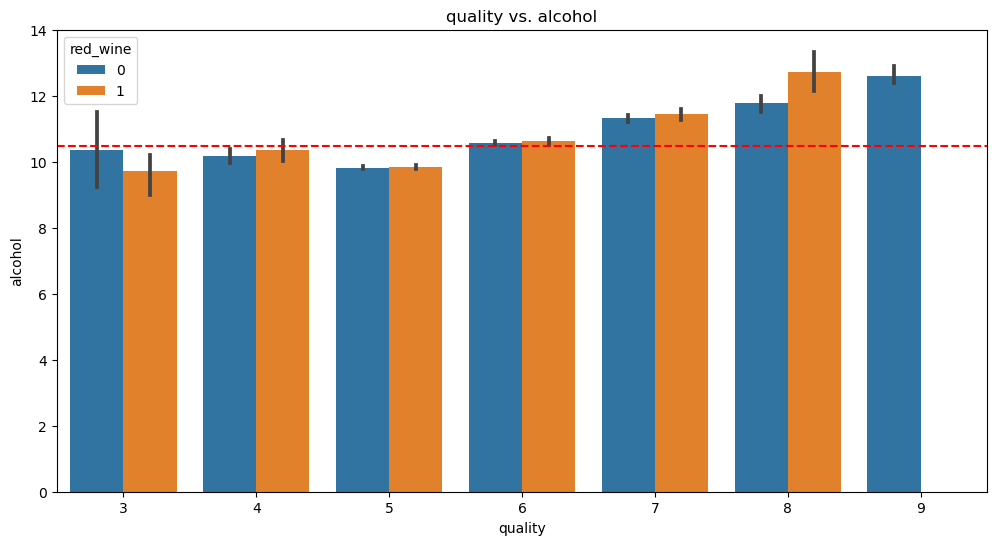

In [51]:
cat_var = 'quality'
cont_var = ['alcohol']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [58]:
statistical_tests_cont_cat(train.alcohol,train.quality)

Kruskal-Wallis Test Results:
Test Statistic: 807.4842050814915
P-Value: 3.7184519749416247e-171
We reject the null hypothesis.

ANOVA Results:
Test Statistic: 188.9966142622249
P-Value: 4.62372075183672e-211
We reject the null hypothesis.


## 2. Does ph affects the quality of the wine?

H_$0$ : Ph has no correlation with the quality of the wine.
  
H_$A$: Ph has a correlation with the quality of the wine.

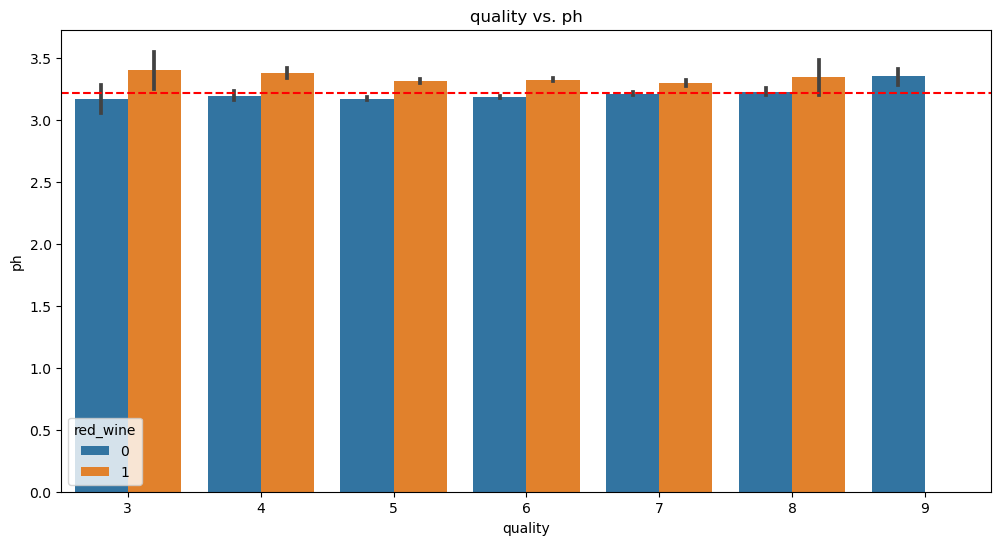

In [52]:
cat_var = 'quality'
cont_var = ['ph']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [60]:
statistical_tests_cont_cat(train.ph,train.quality)

Kruskal-Wallis Test Results:
Test Statistic: 11.448662841873242
P-Value: 0.0754610352547433
We fail to reject the null hypothesis.

ANOVA Results:
Test Statistic: 1.6776642629952452
P-Value: 0.12223427922310885
We fail to reject the null hypothesis.


## 3. Does chloride content affects the quality of the wine?

H_$0$ : Chloride has no correlation with the quality of the wine.
  
H_$A$: Chloride has a correlation with the quality of the wine.

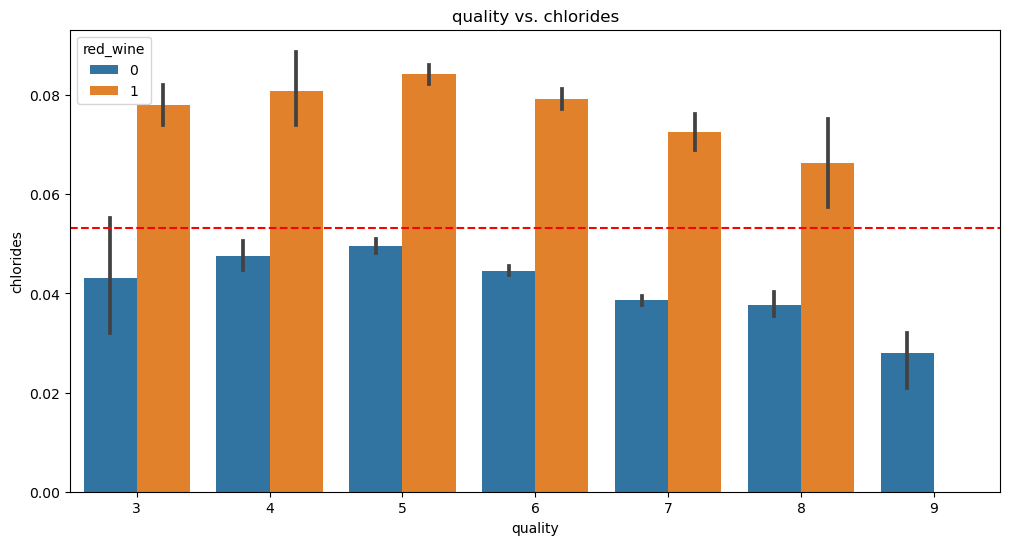

In [61]:
cat_var = 'quality'
cont_var = ['chlorides']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [62]:
statistical_tests_cont_cat(train.chlorides,train.quality)

Kruskal-Wallis Test Results:
Test Statistic: 330.7916962370211
P-Value: 2.045344622550805e-68
We reject the null hypothesis.

ANOVA Results:
Test Statistic: 41.062215389222224
P-Value: 1.0162813310536505e-48
We reject the null hypothesis.


# Clustering

- Features to be use: alcohol, chlorides, residual sugar and density.

In [63]:
x_train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
0,0.662791,0.144444,0.546512,0.028169,0.155172,0.20,0.393939,0.557034,0.159292,0.488372,0.250000,0.0
1,0.337209,0.244444,0.337209,0.098592,0.074713,0.36,0.340067,0.283904,0.522124,0.476744,0.550000,0.0
2,0.139535,0.255556,0.000000,0.267606,0.195402,0.42,0.538721,0.436629,0.513274,0.476744,0.316667,0.0
3,0.372093,0.055556,0.430233,0.570423,0.172414,0.35,0.333333,0.551331,0.292035,0.383721,0.450000,0.0
4,0.558140,0.155556,0.418605,0.056338,0.298851,0.52,0.239057,0.565906,0.663717,0.755814,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.290698,0.655556,0.558140,0.558685,0.229885,0.56,0.727273,0.683777,0.398230,0.348837,0.216667,0.0
3778,0.569767,0.077778,0.348837,0.042254,0.195402,0.28,0.417508,0.449303,0.442478,0.186047,0.300000,0.0
3779,0.232558,0.200000,0.348837,0.089202,0.126437,0.74,0.414141,0.195817,0.424779,0.186047,0.583333,0.0
3780,0.255814,0.266667,0.534884,0.037559,0.218391,0.55,0.616162,0.378327,0.460177,0.313953,0.266667,0.0
